In [2]:
#dependencies
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

import numpy as np

import re

import os, sys

## Optical trapping analysis
----

Below we plot the data from each stretch-relax cycle (SRC) without waiting times. For each of the following nine experiments, we perform 2 SRCs of DNA alone (shown in black) and 15 SRCs of DNA in the presence of HP1$\alpha$. The force-extension curves for DNA and HP1$\alpha$ are color-coded according to their order in the experiment. That is, the first pull is violet, the last pull is red, the rest are somewhere in between.

In [3]:
DNA_only_filenames = []
HP1_filenames = []
for i in os.listdir("pull_data/"):
    if "DNA_stretch" in i:
        DNA_only_filenames.append(i)
    elif "protein stretch" in i:
        HP1_filenames.append(i)

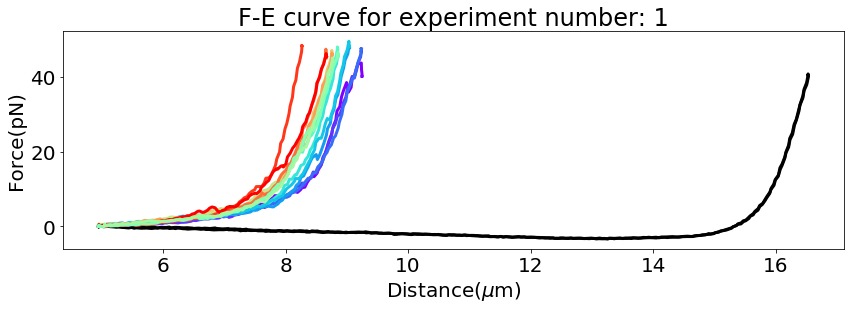

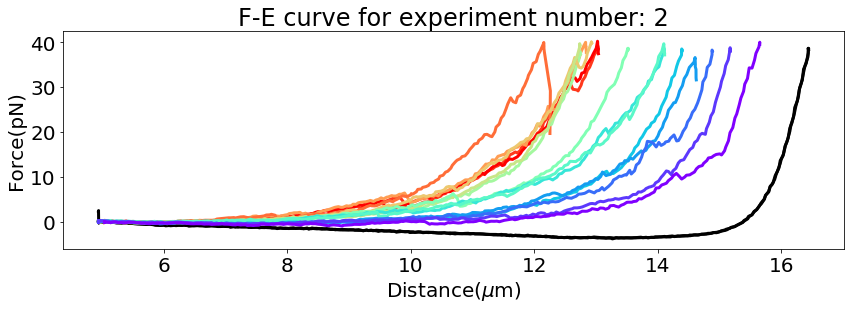

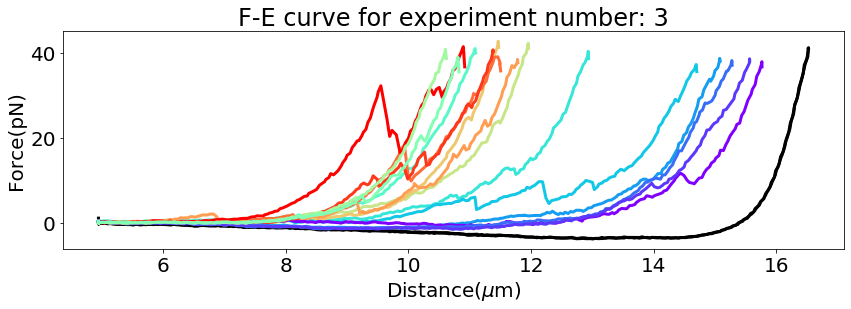

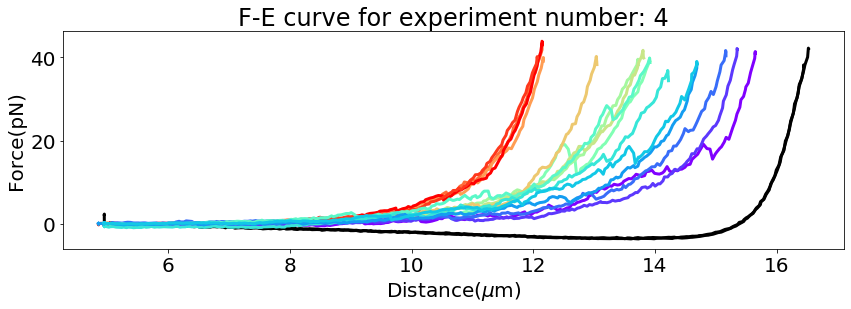

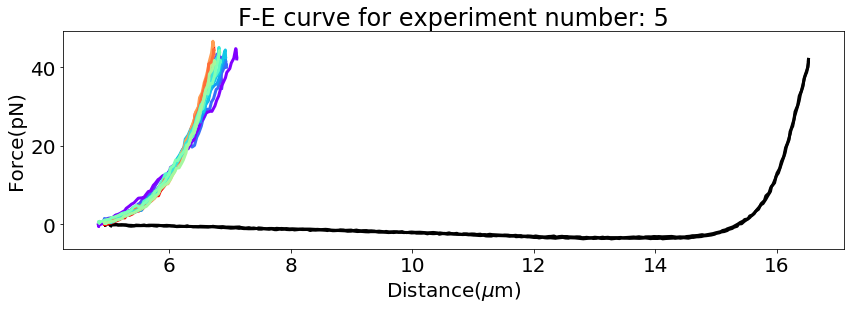

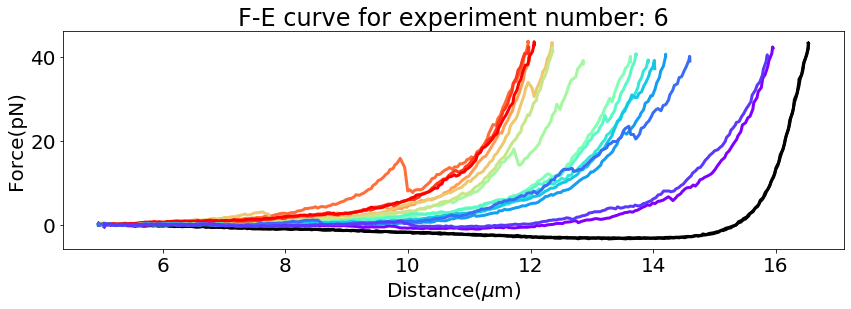

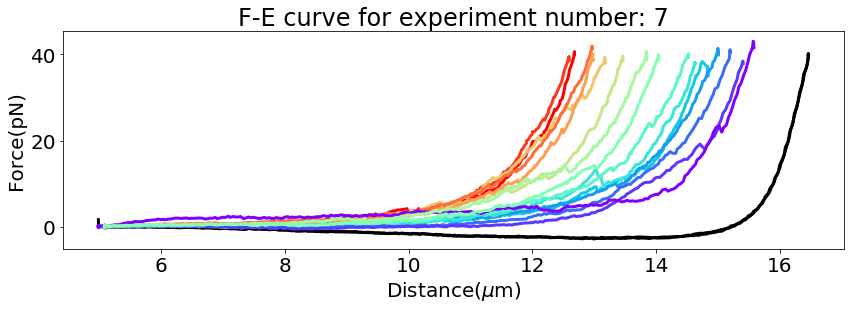

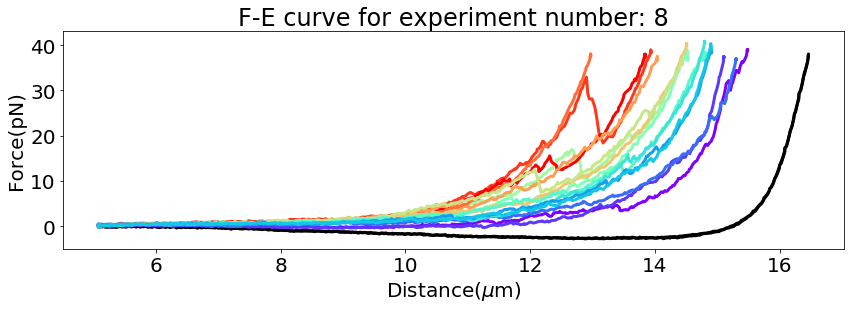

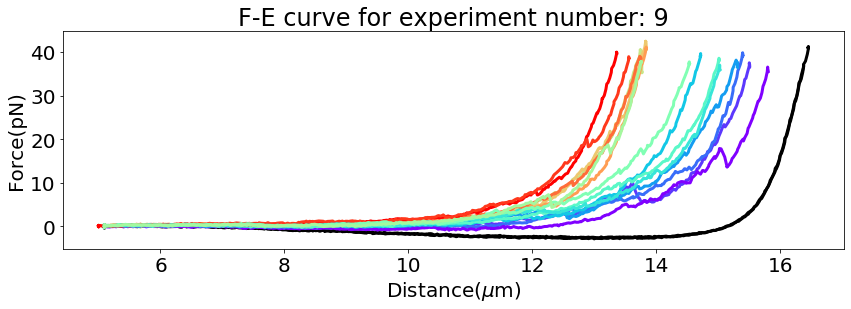

In [4]:
colors = cm.rainbow(np.linspace(0, 1, 15))

count = 0
for exp in range(9):
    
    plt.figure(figsize=(14,4))
    
    for name in DNA_only_filenames:
        exp_number = int(re.findall(r'\d+', name)[0])-1
        pull_number = int(re.findall(r'\d+', name)[1])-1
        if count==exp_number:
            x,f = [],[]
            file = open("pull_data/"+name,"r")
            for i in file.readlines():
                x.append(float(i.split()[0]))
                f.append(float(i.split()[1]))
            file.close()
            plt.plot(x, f, "k", linewidth = 3)
        else:
            pass
        
    for name in HP1_filenames:
        exp_number = int(re.findall(r'\d+', name)[0])-1
        pull_number = int(re.findall(r'\d+', name)[1])-1
        if count==exp_number:
            x,f = [],[]
            file = open("pull_data/"+name,"r")
            for i in file.readlines():
                x.append(float(i.split()[0]))
                f.append(float(i.split()[1]))
            file.close()
            plt.plot(x, f, color = colors[pull_number], linewidth = 3)
        else:
            pass
        
    plt.title("F-E curve for experiment number: "+str(count+1))
    plt.xlabel("Distance($\mu$m)")
    plt.ylabel("Force(pN)")
    count+=1

plt.show() 

Next for all of the pulling traces we determine the extension of the DNA at ~20pN. These values are then presented as a histogram.

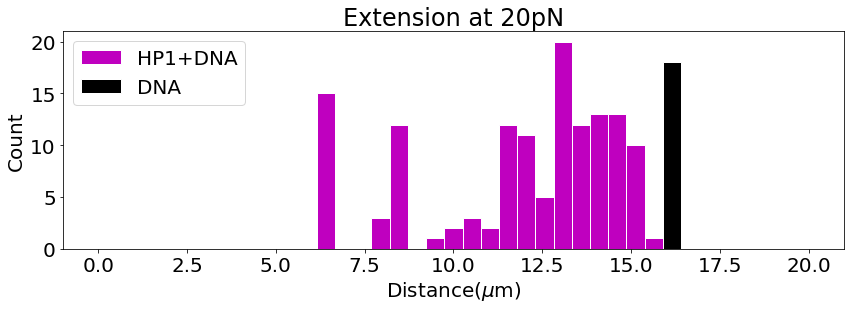

In [10]:
HP1_ext_at_20pN = []
DNA_ext_at_20pN = []

for name in DNA_only_filenames:
    x,f = [],[]
    file = open("pull_data/"+name,"r")
    for i in file.readlines():
        x.append(float(i.split()[0]))
        f.append(float(i.split()[1]))
    file.close()
    index_20 = np.argmax(np.array(f)>=20)
    DNA_ext_at_20pN.append(x[index_20])

        
for name in HP1_filenames:
    x,f = [],[]
    file = open("pull_data/"+name,"r")
    for i in file.readlines():
        x.append(float(i.split()[0]))                
        f.append(float(i.split()[1]))
    file.close()
    index_20 = np.argmax(np.array(f)>=20)
    HP1_ext_at_20pN.append(x[index_20])

    
bins = np.linspace(0,20,40)

plt.figure(figsize=(14,4))
plt.hist(HP1_ext_at_20pN, bins, label='HP1+DNA', 
         ec = "white", fc ="m")
plt.hist(DNA_ext_at_20pN, bins, label='DNA', 
         ec = "white", fc ="k")
plt.title("Extension at 20pN")
plt.xlabel("Distance($\mu$m)")
plt.ylabel("Count")
plt.legend()
plt.show()